<a href="https://colab.research.google.com/github/Arun28S12/Data-Science-Learning/blob/main/Outlier_Detection_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection Techniques in Python

This notebook covers multiple techniques to detect outliers using statistical methods, machine learning, and domain knowledge. Each method includes explanations, real-life scenarios, and implementation with outputs.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Sample data: Blood Pressure readings
data = pd.DataFrame({'BloodPressure': [120, 122, 119, 118, 300, 121, 117]})
data

,BloodPressure
0,120
1,122
2,119
3,118
4,300
5,121
6,117


✅ **Categories of Outlier Detection Techniques**

- **Statistical Methods**
- **Visualization Methods**
- **Machine Learning-Based Methods**
- **Distance & Density-Based Methods**
- **Domain-Specific Logic**

### 1. Z-Score Method (Standard Score)

🔍 **Concept**  
Measures how many standard deviations a data point is from the mean.  
If **Z > 3** or **Z < -3**, it's considered an outlier.

✅ **When to Use**
- Data is normally distributed
- Dataset is moderate to large in size


###🧪 Code Example

In [2]:
z_scores = np.abs(stats.zscore(data['BloodPressure']))
data['Z-Score'] = z_scores
data['Outlier_Z'] = z_scores > 3
data

,BloodPressure,Z-Score,Outlier_Z
0,120,0.400207,False
1,122,0.368552,False
2,119,0.416034,False
3,118,0.431862,False
4,300,2.448723,False
5,121,0.384379,False
6,117,0.447689,False


### 🎯 Use Cases

1. **Healthcare**: Detect faulty readings from blood pressure sensors  
2. **Banking**: Identify unusually high loan disbursements  
3. **Retail**: Spot anomalies in daily sales figures


### 2. IQR (Interquartile Range) Method

  🔍 **Concept**  
  Outliers are points that fall outside the range:  
  **[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]**

  ✅ **When to Use**
    - Suitable for non-normal distributions  
    - Ideal for tabular data


###🧪 Code Example

In [3]:
Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Outlier_IQR'] = (data['BloodPressure'] < lower_bound) | (data['BloodPressure'] > upper_bound)
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR
0,120,0.400207,False,False
1,122,0.368552,False,False
2,119,0.416034,False,False
3,118,0.431862,False,False
4,300,2.448723,False,True
5,121,0.384379,False,False
6,117,0.447689,False,False


## 3. Boxplot Visualization

🔍 **Concept**  
&nbsp;&nbsp;&nbsp;&nbsp;A visual tool that uses IQR to highlight outliers.

✅ **When to Use**  
&nbsp;&nbsp;&nbsp;&nbsp;Best for Exploratory Data Analysis (EDA)

🎯 **Use Cases**  
&nbsp;&nbsp;&nbsp;&nbsp;- **HR Analytics**: Identify salary outliers  
&nbsp;&nbsp;&nbsp;&nbsp;- **Sales**: Visualize monthly sales anomalies  
&nbsp;&nbsp;&nbsp;&nbsp;- **Production**: Analyze machine production times


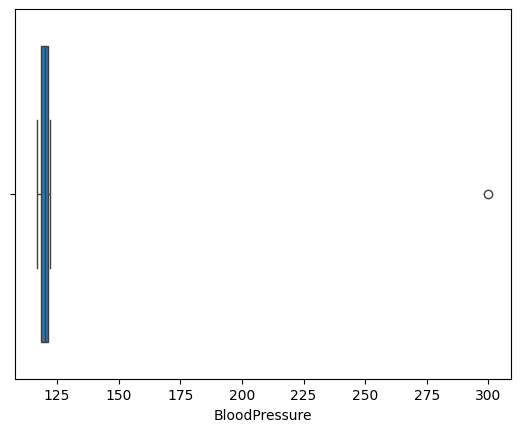

In [4]:
sns.boxplot(x=data['BloodPressure'])
plt.show()

## 4. Isolation Forest

🔍 **Concept**  
&nbsp;&nbsp;&nbsp;&nbsp;Randomly splits data to isolate and identify outliers efficiently.

✅ **When to Use**  
&nbsp;&nbsp;&nbsp;&nbsp;Suitable for large or high-dimensional datasets

🎯 **Use Cases**  
&nbsp;&nbsp;&nbsp;&nbsp;- **Finance**: Credit card fraud detection  
&nbsp;&nbsp;&nbsp;&nbsp;- **IT Operations**: Spot abnormal CPU usage  
&nbsp;&nbsp;&nbsp;&nbsp;- **Insurance**: Identify fraudulent claim pattern

🧪 **Code Example**
&nbsp;&nbsp;&nbsp;&nbsp;*Add your implementation code here in a code cell.*


In [5]:
model = IsolationForest(contamination=0.1, random_state=42)
data['IForest_Outlier'] = model.fit_predict(data[['BloodPressure']]) == -1
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier
0,120,0.400207,False,False,False
1,122,0.368552,False,False,False
2,119,0.416034,False,False,False
3,118,0.431862,False,False,False
4,300,2.448723,False,True,True
5,121,0.384379,False,False,False
6,117,0.447689,False,False,False


## 5. DBSCAN (Density-Based Spatial Clustering)

🔍 **Concept**  
&nbsp;&nbsp;&nbsp;&nbsp;Clusters data based on density and labels low-density regions as outliers.

✅ **When to Use**  
&nbsp;&nbsp;&nbsp;&nbsp;Effective for geospatial or location-based datasets

🎯 **Use Cases**  
&nbsp;&nbsp;&nbsp;&nbsp;- **Delivery**: Identify vehicles that deviated from routes  
&nbsp;&nbsp;&nbsp;&nbsp;- **Telecom**: Detect signal strength anomalies  
&nbsp;&nbsp;&nbsp;&nbsp;- **Agriculture**: Spot irregular sensor readings


In [6]:
X_scaled = StandardScaler().fit_transform(data[['BloodPressure']])
db = DBSCAN(eps=1.5, min_samples=2).fit(X_scaled)
data['DBSCAN_Outlier'] = db.labels_ == -1
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier
0,120,0.400207,False,False,False,False
1,122,0.368552,False,False,False,False
2,119,0.416034,False,False,False,False
3,118,0.431862,False,False,False,False
4,300,2.448723,False,True,True,True
5,121,0.384379,False,False,False,False
6,117,0.447689,False,False,False,False


## 6. Modified Z-Score

🔍 **Concept**  
&nbsp;&nbsp;&nbsp;&nbsp;Uses the median and MAD (Median Absolute Deviation) to detect outliers.  
&nbsp;&nbsp;&nbsp;&nbsp;More robust for small or skewed datasets.

✅ **When to Use**  
&nbsp;&nbsp;&nbsp;&nbsp;- Small datasets  
&nbsp;&nbsp;&nbsp;&nbsp;- Non-normal data

🎯 **Use Cases**  
&nbsp;&nbsp;&nbsp;&nbsp;- **IoT**: Detect abnormal readings from edge devices  
&nbsp;&nbsp;&nbsp;&nbsp;- **Manufacturing**: Flag outlier cycle times  
&nbsp;&nbsp;&nbsp;&nbsp;- **Biotech**: Small-scale lab data validation


In [7]:
median_val = np.median(data['BloodPressure'])
mad = np.median(np.abs(data['BloodPressure'] - median_val))
data['Modified_Z'] = 0.6745 * (data['BloodPressure'] - median_val) / mad
data['Outlier_ModZ'] = np.abs(data['Modified_Z']) > 3.5
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier,Modified_Z,Outlier_ModZ
0,120,0.400207,False,False,False,False,0.00000,False
1,122,0.368552,False,False,False,False,0.67450,False
2,119,0.416034,False,False,False,False,-0.33725,False
3,118,0.431862,False,False,False,False,-0.67450,False
4,300,2.448723,False,True,True,True,60.70500,True
5,121,0.384379,False,False,False,False,0.33725,False
6,117,0.447689,False,False,False,False,-1.01175,False


## 7. Local Outlier Factor (LOF)

🔍 **Concept**  
&nbsp;&nbsp;&nbsp;&nbsp;Evaluates the local density of each data point and compares it with neighbors to determine anomalies.

✅ **When to Use**  
&nbsp;&nbsp;&nbsp;&nbsp;- Best for clustered data  
&nbsp;&nbsp;&nbsp;&nbsp;- When local context is important

🎯 **Use Cases**  
&nbsp;&nbsp;&nbsp;&nbsp;- **Cybersecurity**: Detect suspicious login activity  
&nbsp;&nbsp;&nbsp;&nbsp;- **Social Media**: Identify bot-like posting behavior  
&nbsp;&nbsp;&nbsp;&nbsp;- **Customer Service**: Abnormal call durations


In [8]:
lof = LocalOutlierFactor(n_neighbors=2)
data['LOF_Outlier'] = lof.fit_predict(data[['BloodPressure']]) == -1
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier,Modified_Z,Outlier_ModZ,LOF_Outlier
0,120,0.400207,False,False,False,False,0.00000,False,False
1,122,0.368552,False,False,False,False,0.67450,False,False
2,119,0.416034,False,False,False,False,-0.33725,False,False
3,118,0.431862,False,False,False,False,-0.67450,False,False
4,300,2.448723,False,True,True,True,60.70500,True,True
5,121,0.384379,False,False,False,False,0.33725,False,False
6,117,0.447689,False,False,False,False,-1.01175,False,False


## 8. Domain-Driven Rules

🔍 **Concept**  
&nbsp;&nbsp;&nbsp;&nbsp;Outliers are flagged using predefined thresholds based on domain expertise or business rules.

🎯 **Use Cases**  
&nbsp;&nbsp;&nbsp;&nbsp;- **Healthcare**: Flag hypertensive crises (BP > 180)  
&nbsp;&nbsp;&nbsp;&nbsp;- **Retail**: Trigger alerts for suspiciously high cart values  
&nbsp;&nbsp;&nbsp;&nbsp;- **Airlines**: Detect unusually long layover durations

✅ **When to Use**  
&nbsp;&nbsp;&nbsp;&nbsp;- Established business logic exists  
&nbsp;&nbsp;&nbsp;&nbsp;- Interpretability is crucial


In [9]:
data['Domain_Outlier'] = data['BloodPressure'] > 180
data

,BloodPressure,Z-Score,Outlier_Z,Outlier_IQR,IForest_Outlier,DBSCAN_Outlier,Modified_Z,Outlier_ModZ,LOF_Outlier,Domain_Outlier
0,120,0.400207,False,False,False,False,0.00000,False,False,False
1,122,0.368552,False,False,False,False,0.67450,False,False,False
2,119,0.416034,False,False,False,False,-0.33725,False,False,False
3,118,0.431862,False,False,False,False,-0.67450,False,False,False
4,300,2.448723,False,True,True,True,60.70500,True,True,True
5,121,0.384379,False,False,False,False,0.33725,False,False,False
6,117,0.447689,False,False,False,False,-1.01175,False,False,False


## ✅ Summary Comparison Table

| Technique         | Best Used For                 | Assumes Distribution | Requires Scaling | Speed   |
|-------------------|-------------------------------|-----------------------|------------------|---------|
| Z-Score           | Normal distribution           | Yes                   | Yes              | Fast    |
| IQR               | Tabular, general data         | No                    | No               | Fast    |
| Boxplot           | EDA, visualization            | No                    | No               | Visual  |
| Isolation Forest  | Large/high-dimensional data   | No                    | Sometimes         | Medium  |
| DBSCAN            | Geospatial/cluster anomalies  | No                    | Yes              | Slower  |
| Modified Z        | Small or skewed datasets      | No                    | No               | Fast    |
| LOF               | Clustered/local anomalies     | No                    | Yes              | Medium  |
| Domain Rules      | Known threshold conditions    | No                    | No               | Fast    |
